Lab 3: K-Means Clustering

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Question 1: 

In [72]:
def cluster(img_path, k):
    # Get and transform image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    arr = np.asarray(image)
    arr2d = np.reshape(arr, (arr.shape[0]*arr.shape[1], 3))

    # Guess and train clusters
    clusterer = KMeans(k, init='k-means++').fit(arr2d)
    arrFlat = clusterer.predict(arr2d)
    
    # Fit clusters to image
    for i in range(len(arrFlat)):
         arr2d[i] = clusterer.cluster_centers_[arrFlat[i]]
    newArr = np.reshape(arr2d, arr.shape)
    return newArr, arrFlat, clusterer.cluster_centers_


Question 2:

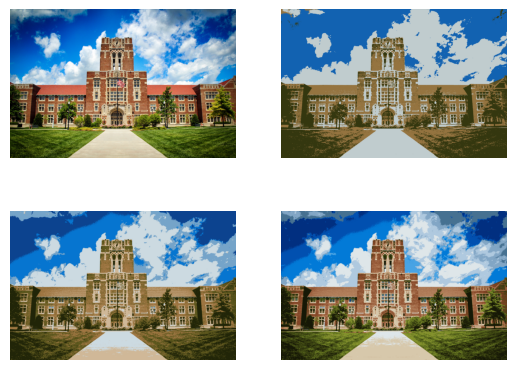

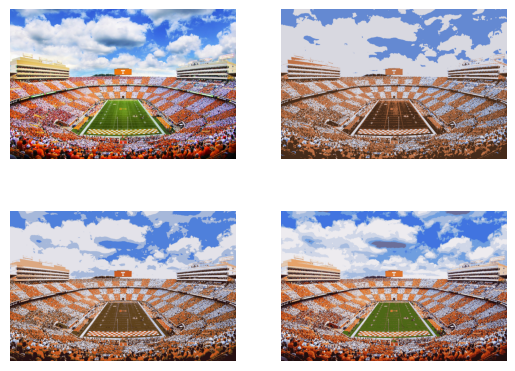

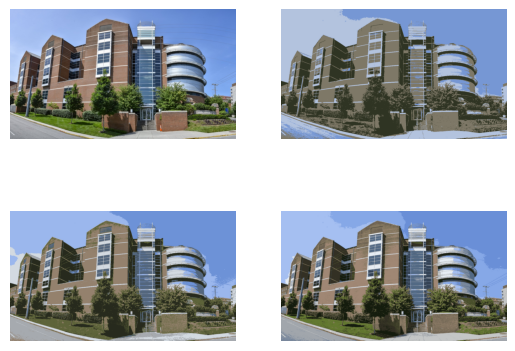

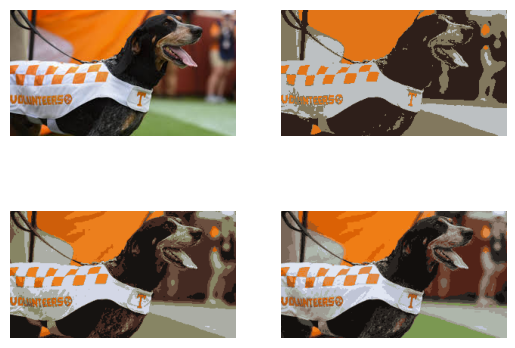

In [83]:
images = ['ayreshall.jpeg', 'checkerneyland.jpeg', 'minkao.jpeg', 'smokey.jpeg']

for i in range(4):
    figure = plt.figure()
    img = './images/'+images[i]
    img0 = np.asarray(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))
    img1, N, A = cluster(img, 4)
    img2, N, A = cluster(img, 8)
    img3, N, A = cluster(img, 16)
    figure.add_subplot(2,2,1)
    plt.imshow(img0)
    plt.axis('off')
    figure.add_subplot(2,2,2)
    plt.imshow(img1)
    plt.axis('off')
    figure.add_subplot(2,2,3)
    plt.imshow(img2)
    plt.axis('off')
    figure.add_subplot(2,2,4)
    plt.imshow(img3)
    plt.axis('off')

Question 3:

<Figure size 640x480 with 0 Axes>

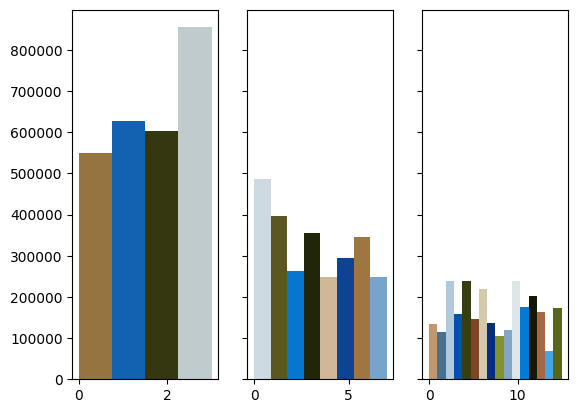

<Figure size 640x480 with 0 Axes>

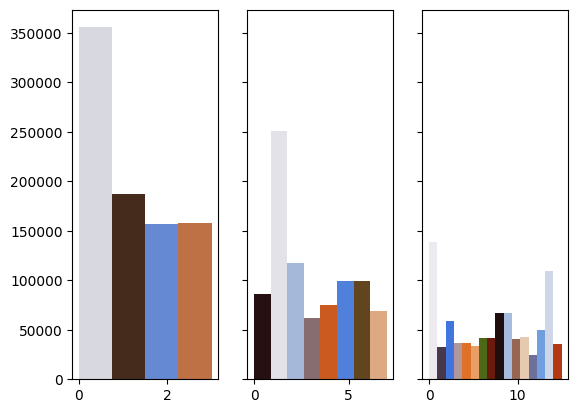

<Figure size 640x480 with 0 Axes>

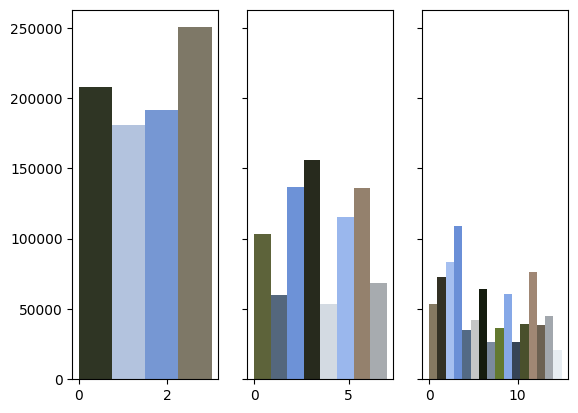

<Figure size 640x480 with 0 Axes>

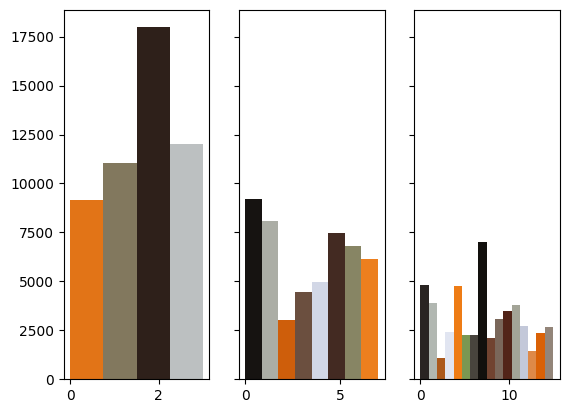

In [81]:
images = ['ayreshall.jpeg', 'checkerneyland.jpeg', 'minkao.jpeg', 'smokey.jpeg']

for i in range(4):
    figure = plt.figure()
    img = './images/'+images[i]
    fig, axs = plt.subplots(1,3, sharey=True)
    plt.title = images[i]
    # img0 = np.asarray(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))
    img1, hist1, centers = cluster(img, 4)
    N, B, patches = axs[0].hist(hist1, 4)
    for c in range(len(patches)):
        patches[c].set_facecolor(centers[c]/256)

    img2, hist2, centers = cluster(img, 8)
    N, B, patches = axs[1].hist(hist2, 8)
    for c in range(len(patches)):
        patches[c].set_facecolor(centers[c]/256)

    img3, hist3, centers = cluster(img, 16)
    N, B, patches = axs[2].hist(hist3, 16)
    for c in range(len(patches)):
        patches[c].set_facecolor(centers[c]/256)